In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import pandas as pd

In [81]:
df = pd.read_csv("/content/drive/MyDrive/data cancer.csv")
df.shape

(569, 33)

In [82]:
df.drop('Unnamed: 32', inplace=True, axis=1)
df.drop('id', inplace=True, axis=1)
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [83]:
df['diagnosis'] = df['diagnosis'].map({'M':0,'B':1})
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [84]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [85]:
covariance_matrix = np.cov(X_std.T)
eigen_values,eigen_vectors = np.linalg.eig(covariance_matrix)

In [95]:
eigen_pairs = [(np.abs(eigen_values[i]) , eigen_vectors[:,i]) for i in range(len(eigen_values))]

eigen_pairs.sort()
eigen_pairs.reverse()


99828.0684709703

In [107]:
for i in range(0,30):
  print(eigen_pairs[i][0])

13.304990794374557
5.701374603726145
2.8229101550062277
1.9841275177301998
1.6516332423301214
1.2094822398029748
0.676408881700907
0.4774562546895082
0.41762878210781734
0.3513108748817337
0.2944331534911641
0.2616211613661208
0.24178242132831354
0.15728614921759346
0.09430069560105576
0.08000340447737686
0.059503613530431834
0.05271142221014788
0.04956470021298141
0.031214260553066506
0.03002566309042833
0.027487711338904132
0.024383691354591244
0.018086793984305273
0.015508527134418882
0.008192037117607
0.0069126125791843995
0.0015921360011976334
0.0007501214127191807
0.0001332790566637439


<h1> Find Condition Number

In [99]:
lambda_max = eigen_pairs[0][0]
lambda_min = eigen_pairs[-1][0]
condition_number = lambda_max / lambda_min
condition_number

99828.0684709703

<h1> Plot Data

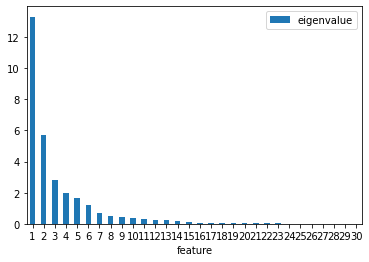

In [109]:
df = pd.DataFrame({'feature':[i+1 for i in range(0,30)], 'eigenvalue':sorted(eigen_values, reverse=True)})
ax = df.plot.bar(x='feature', y='eigenvalue', rot=0)

In [123]:
dims_to_remove = 2
reduced_eigenvectors = []
for i in range(30 - dims_to_remove):
     reduced_eigenvectors.append(eigen_pairs[i][1].reshape(30 ,1))

new_eignenvector = np.hstack(tuple(reduced_eigenvectors))

In [122]:
dimension_reduced_data=X_std.dot(new_eignenvector)
np.shape(dimension_reduced_data)

(569, 28)